In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from scipy.stats import zscore


import warnings
warnings.filterwarnings('ignore')

Loading the dataset

In [2]:
df=pd.read_csv("customer_retention_dataset.csv") #reading the file
df

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Female,21-30 years,Solan,173212,1-2 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,Android,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,Female,31-40 years,Ghaziabad,201008,1-2 years,31-40 times,Mobile Internet,Smartphone,Others,Android,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,Female,41-50 yaers,Bangalore,560010,2-3 years,Less than 10 times,Mobile internet,Laptop,Others,Window/windows Mobile,...,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Amazon.in
267,Female,Less than 20 years,Solan,173229,2-3 years,Less than 10 times,Wi-Fi,Smartphone,5.5 inches,Android,...,Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com",Amazon.in


In [3]:
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


checking for datasets

In [4]:
df.shape

(269, 71)

In [5]:
df.dtypes #searching for data types

1Gender of respondent                                                   object
2 How old are you?                                                      object
3 Which city do you shop online from?                                   object
4 What is the Pin Code of where you shop online from?                    int64
5 Since How Long You are Shopping Online ?                              object
                                                                         ...  
Longer delivery period                                                  object
Change in website/Application design                                    object
Frequent disruption when moving from one page to another                object
Website is as efficient as before                                       object
Which of the Indian online retailer would you recommend to a friend?    object
Length: 71, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

checking for null values

In [7]:
df.isnull().sum() #no null values

1Gender of respondent                                                   0
2 How old are you?                                                      0
3 Which city do you shop online from?                                   0
4 What is the Pin Code of where you shop online from?                   0
5 Since How Long You are Shopping Online ?                              0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

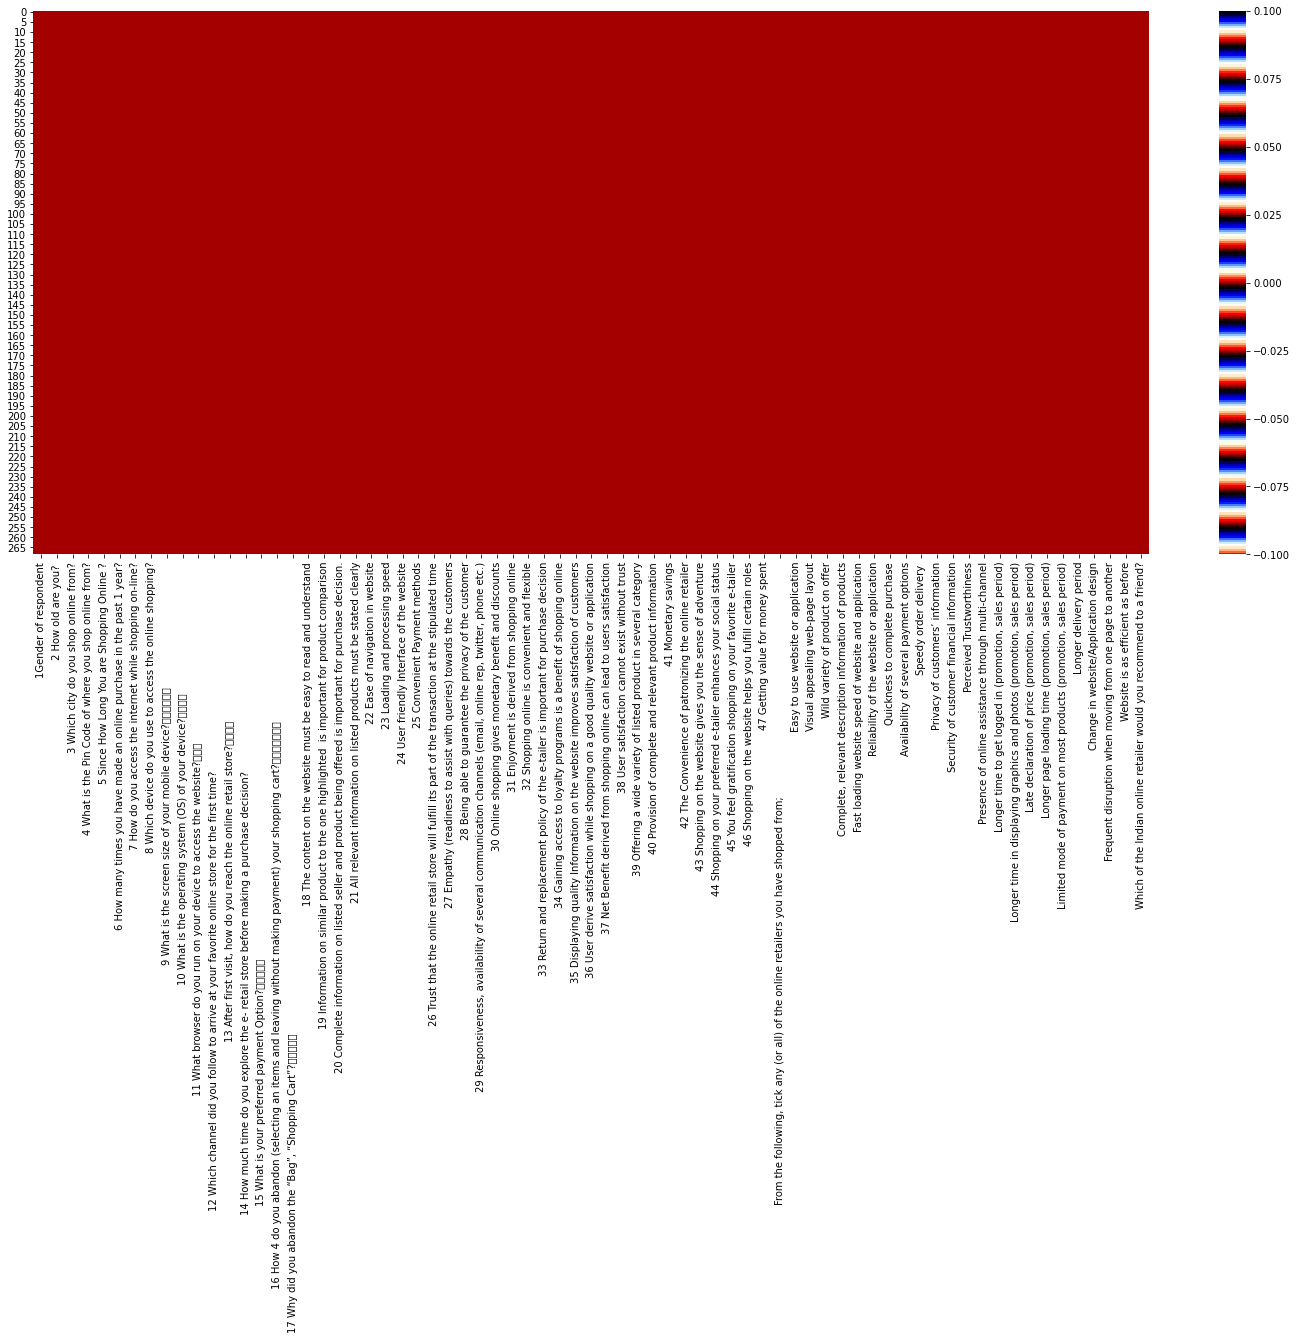

In [87]:
#visualizing null values
plt.figure(figsize=(25,10))
sns.heatmap(df.isnull(),cmap="flag")
plt.show()


In [88]:
# Checking the value counts of each columns
for i in df.columns:
        print(df[i].value_counts())
        print('*'*100)


1    180
0     89
Name: 1Gender of respondent, dtype: int64
****************************************************************************************************
3    81
2    79
4    70
1    20
5    19
Name: 2 How old are you? , dtype: int64
****************************************************************************************************
Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Ghaziabad        18
Solan            18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: 3 Which city do you shop online from?, dtype: int64
****************************************************************************************************
201308    38
132001    19
201310    18
110044    16
173229     9
173212     9
250001     9
122018     8
560037     8
132036     8
560010     8
110011     7
110008     7
201306     7
110014     6
110018     6
201008     5
201009     5
201305     5
201312     5
244001     5
530068

# DATASET DESCRIPTION

In [8]:
df.describe()

,4 What is the Pin Code of where you shop online from?
count,269.000000
mean,220465.747212
std,140524.341051
min,110008.000000
25%,122018.000000
50%,201303.000000
75%,201310.000000
max,560037.000000


reading data from codesheet

In [9]:
df = pd.read_excel('customer_retention_dataset.xlsx', sheet_name='codedsheet')

In [65]:
df.dtypes

1Gender of respondent                                                    int64
2 How old are you?                                                       int64
3 Which city do you shop online from?                                   object
4 What is the Pin Code of where you shop online from?                    int64
5 Since How Long You are Shopping Online ?                               int64
                                                                         ...  
Longer delivery period                                                  object
Change in website/Application design                                    object
Frequent disruption when moving from one page to another                object
Website is as efficient as before                                       object
Which of the Indian online retailer would you recommend to a friend?    object
Length: 71, dtype: object

In [10]:
df.shape #checking for rows and columns

(269, 71)

In [11]:
df.columns

Index(['1Gender of respondent', '2 How old are you? ',
       '3 Which city do you shop online from?',
       '4 What is the Pin Code of where you shop online from?',
       '5 Since How Long You are Shopping Online ?',
       '6 How many times you have made an online purchase in the past 1 year?',
       '7 How do you access the internet while shopping on-line?',
       '8 Which device do you use to access the online shopping?',
       '9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        ',
       '10 What is the operating system (OS) of your device?\t\t\t\t                                          ',
       '11 What browser do you run on your device to access the website?\t\t\t                                                          ',
       '12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   ',
       '13 After first visit, how 

In [12]:
df.head()

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,Delhi,110009,5,4,4,3,5,1,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,1,2,Delhi,110030,5,5,2,1,2,3,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,1,2,Greater Noida,201308,4,5,3,1,4,2,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,0,2,Karnal,132001,4,1,3,1,4,3,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,1,2,Bangalore,530068,3,2,2,1,2,3,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [13]:
df1 = df.iloc[0:,0:2]

In [14]:
df1

,1Gender of respondent,2 How old are you?
0,0,3
1,1,2
2,1,2
3,0,2
4,1,2
...,...,...
264,1,2
265,1,3
266,1,4
267,1,1


# DATA VISUALIZATION

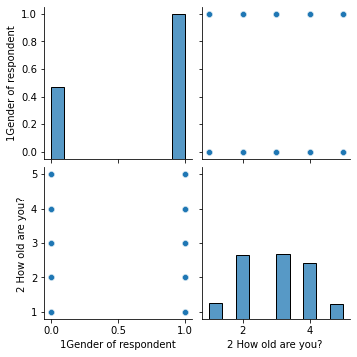

In [15]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(df1)

In [16]:
df2 = df.iloc[0:,3:5]

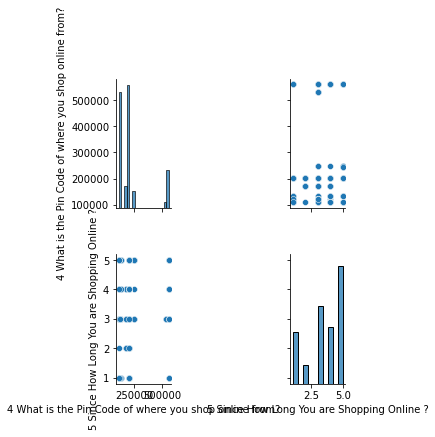

In [17]:
# Seaborn visualization library
import seaborn as sns
# create the default pairplot
sns.pairplot(df2)

In [18]:
df3 = df.iloc[0:,5:7]

In [19]:
df3

,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?
0,4,4
1,5,2
2,5,3
3,1,3
4,2,2
...,...,...
264,1,3
265,4,3
266,1,3
267,1,2


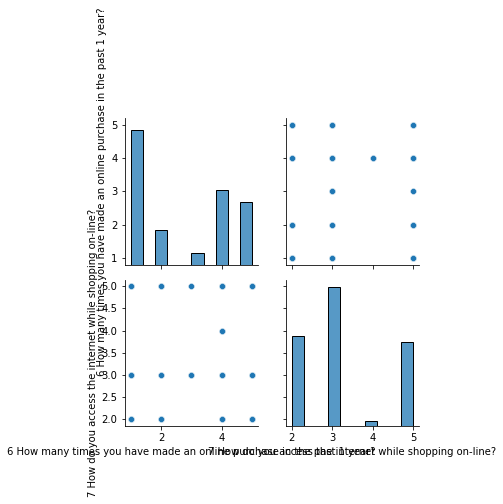

In [20]:
 sns.pairplot(df3)

In [21]:
df4 = df.iloc[0:,7:9]

In [22]:
df4

,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t
0,3,5
1,1,2
2,1,4
3,1,4
4,1,2
...,...,...
264,1,4
265,1,5
266,2,5
267,1,4


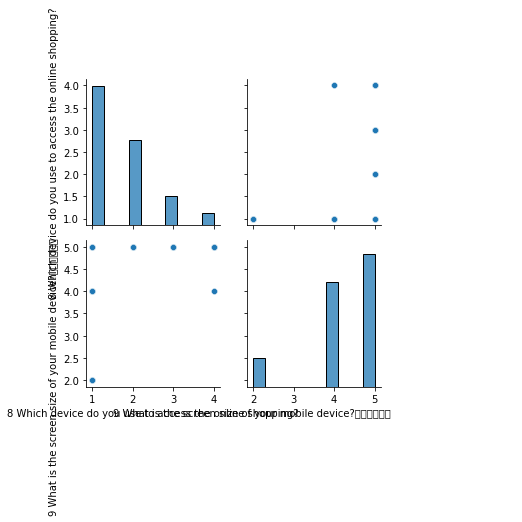

In [23]:
sns.pairplot(df4)

In [24]:
df5 = df.iloc[0:,9:11]

In [25]:
df5

,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t
0,1,1
1,3,1
2,2,1
3,3,2
4,3,2
...,...,...
264,2,4
265,2,1
266,1,1
267,2,1


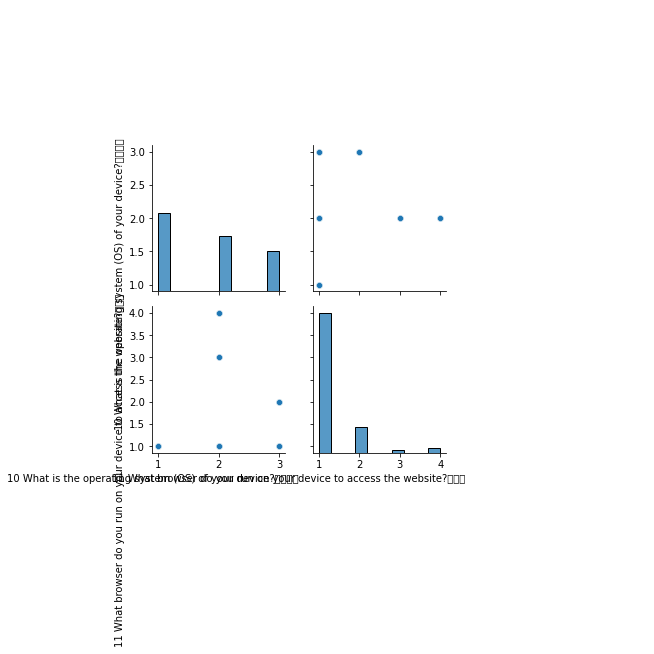

In [26]:
sns.pairplot(df5)

In [27]:
df6 = df.iloc[0:,11:13]

In [28]:
df6

,12 Which channel did you follow to arrive at your favorite online store for the first time?,"13 After first visit, how do you reach the online retail store?\t\t\t\t"
0,1,1
1,1,4
2,1,4
3,1,1
4,3,4
...,...,...
264,4,1
265,1,4
266,1,1
267,1,3


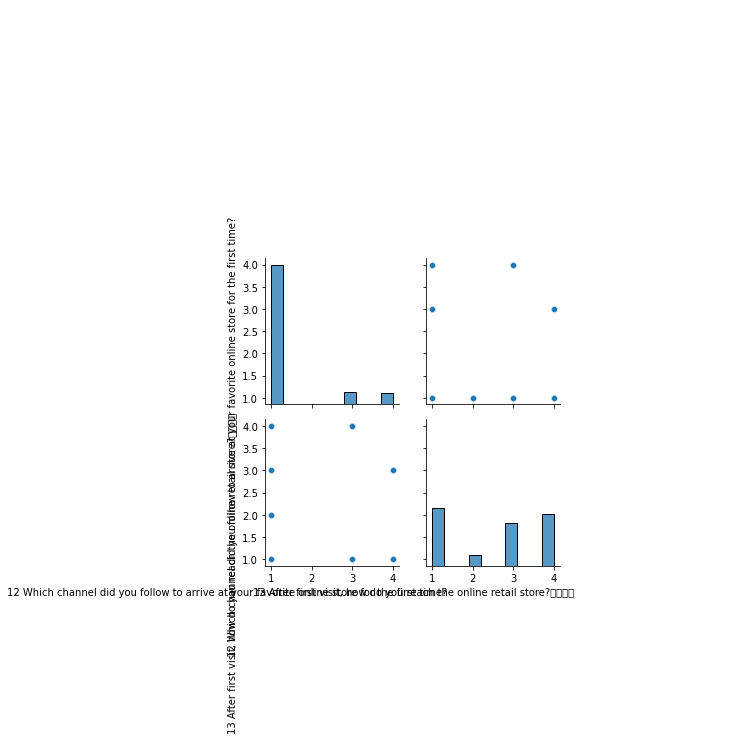

In [29]:
sns.pairplot(df6)

In [30]:
df7 = df.iloc[0:,13:16]

In [31]:
df7

,14 How much time do you explore the e- retail store before making a purchase decision?,15 What is your preferred payment Option?\t\t\t\t\t,16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t
0,3,4,3
1,5,1,5
2,4,4,3
3,3,1,1
4,5,1,4
...,...,...,...
264,5,2,1
265,1,2,3
266,5,1,3
267,2,2,3


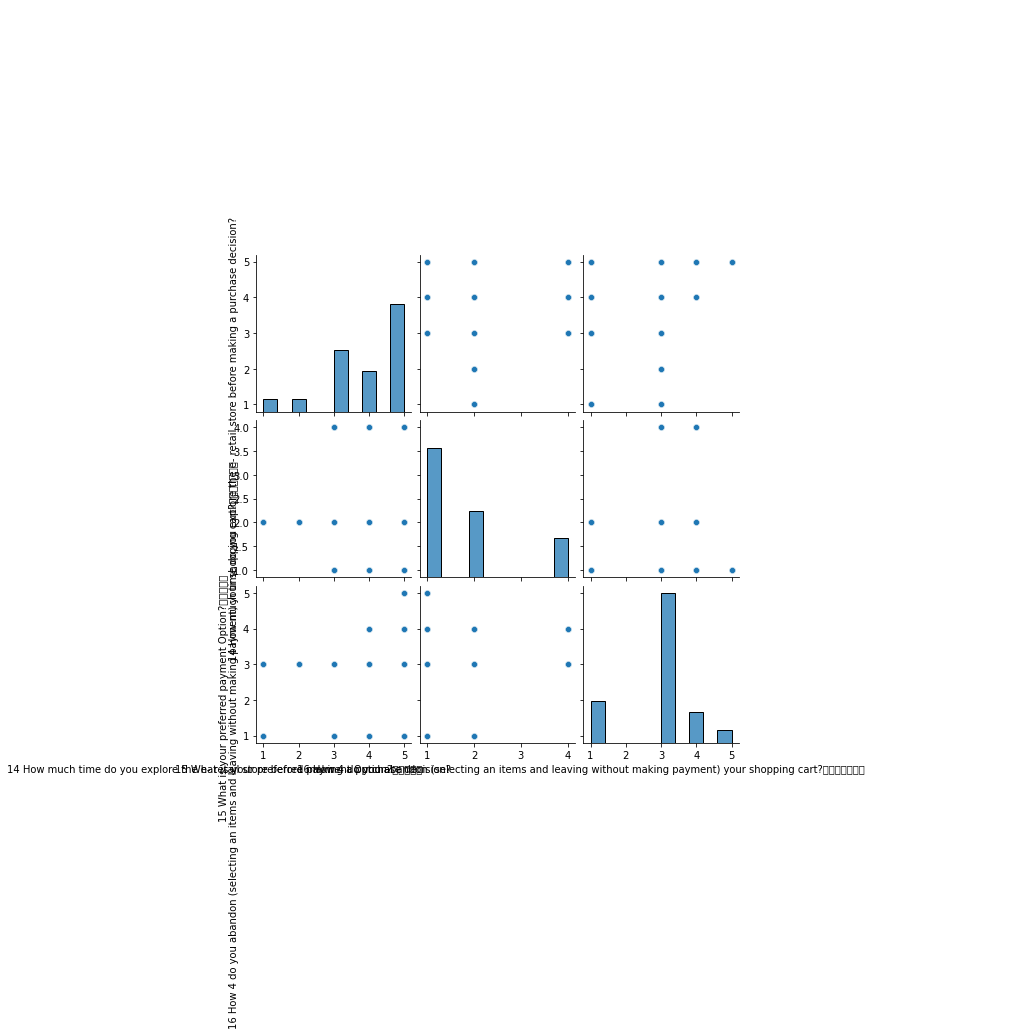

In [32]:
sns.pairplot(df7)

In [33]:
df8 = df.iloc[0:,16:20]

In [34]:
df8

,"17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t",18 The content on the website must be easy to read and understand,19 Information on similar product to the one highlighted is important for product comparison,20 Complete information on listed seller and product being offered is important for purchase decision.
0,3,4,3,3
1,5,5,5,5
2,5,5,4,4
3,2,4,4,3
4,2,5,3,3
...,...,...,...,...
264,2,4,4,4
265,1,5,5,5
266,2,5,5,4
267,4,5,4,5


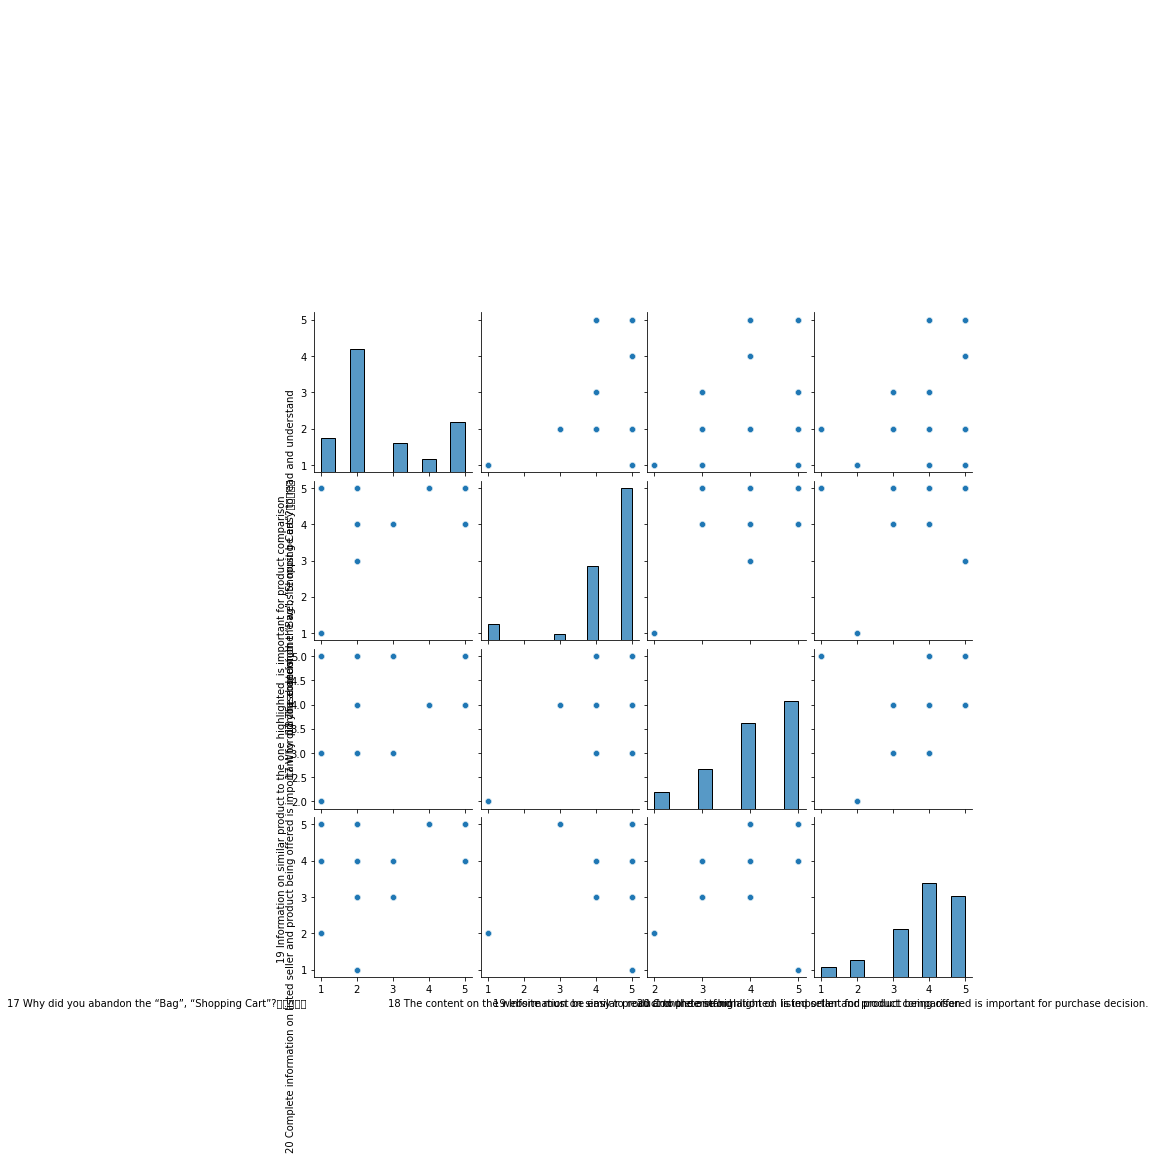

In [35]:
sns.pairplot(df8)

In [36]:
df9 = df.iloc[0:,20:24]

In [37]:
df9

,21 All relevant information on listed products must be stated clearly,22 Ease of navigation in website,23 Loading and processing speed,24 User friendly Interface of the website
0,4,4,1,2
1,5,5,5,5
2,4,4,4,5
3,4,5,4,5
4,4,4,5,5
...,...,...,...,...
264,4,4,4,4
265,5,5,5,5
266,4,5,4,4
267,4,4,4,5


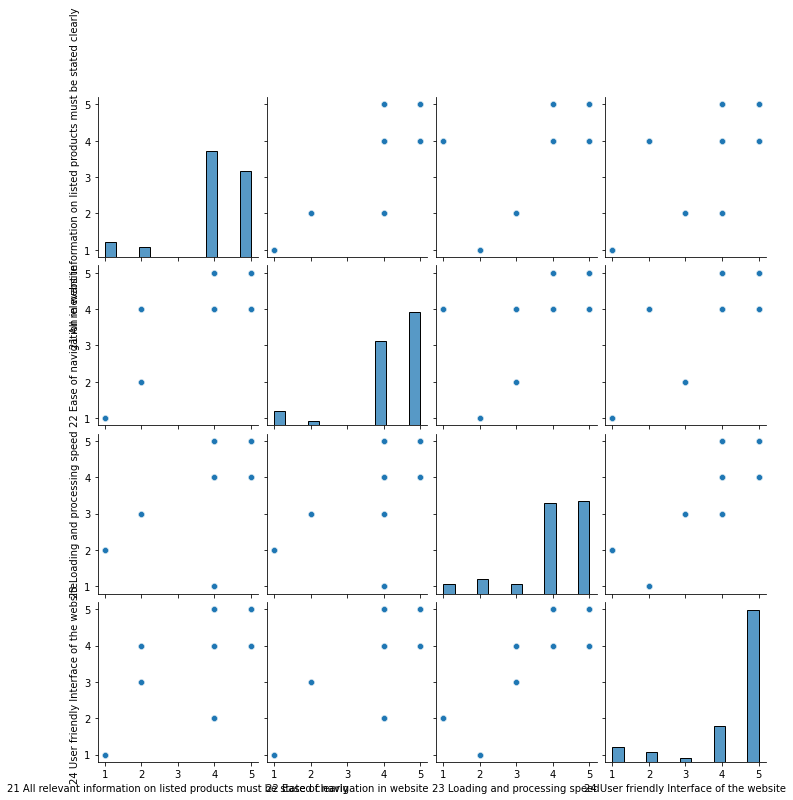

In [38]:
sns.pairplot(df9)

In [39]:
df10 = df.iloc[0:,24:30]

In [40]:
df10

,25 Convenient Payment methods,26 Trust that the online retail store will fulfill its part of the transaction at the stipulated time,27 Empathy (readiness to assist with queries) towards the customers,28 Being able to guarantee the privacy of the customer,"29 Responsiveness, availability of several communication channels (email, online rep, twitter, phone etc.)",30 Online shopping gives monetary benefit and discounts
0,2,2,5,4,4,3
1,5,5,5,5,5,5
2,5,5,5,5,5,5
3,5,4,5,5,4,4
4,5,4,5,4,5,5
...,...,...,...,...,...,...
264,4,4,4,4,4,3
265,5,5,5,5,5,5
266,5,4,3,3,4,4
267,5,5,5,5,5,5


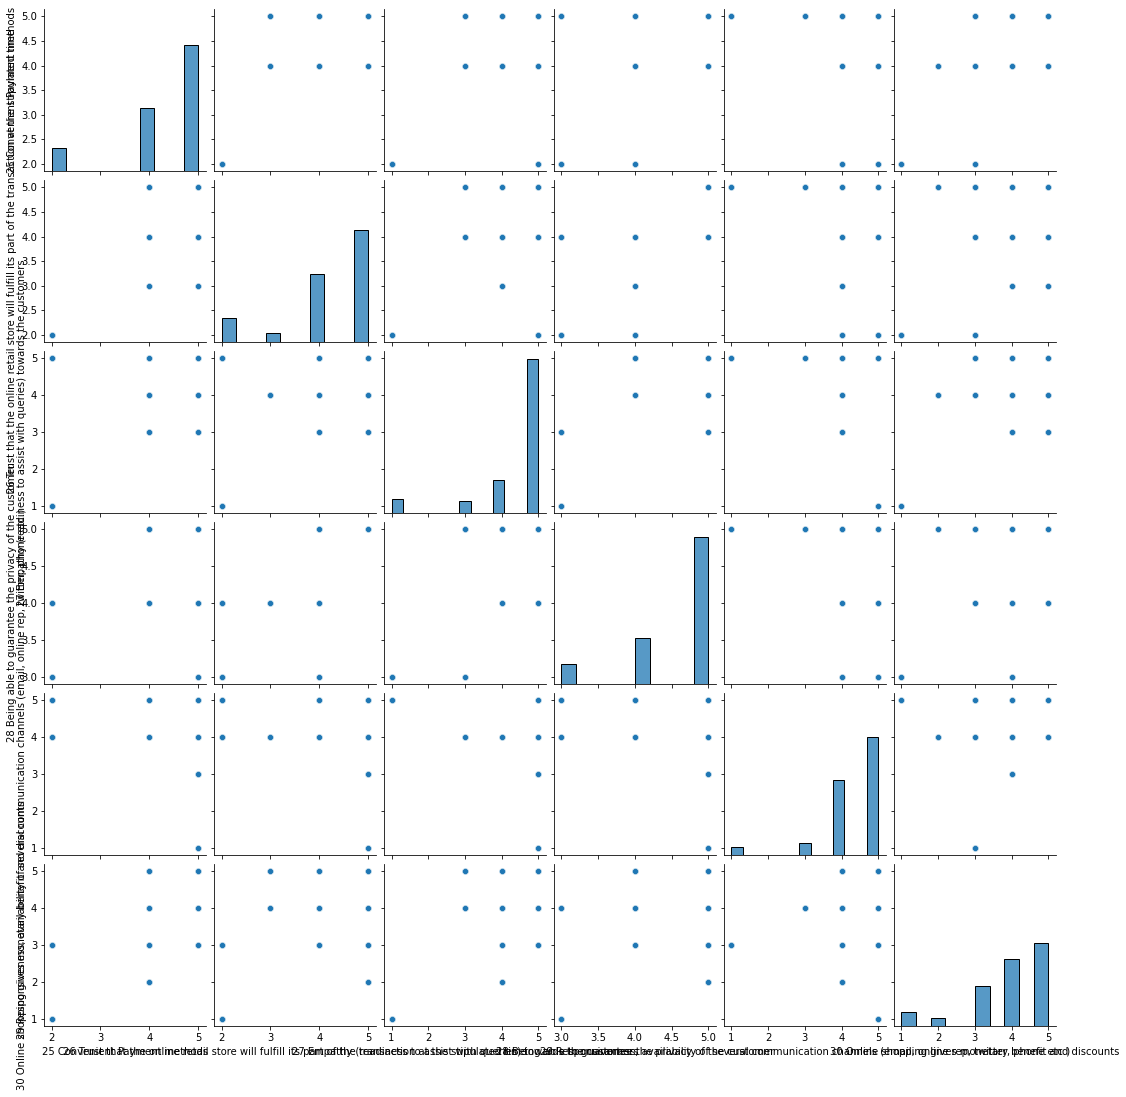

In [41]:
sns.pairplot(df10)

In [42]:
df11 = df.iloc[0:,30:35]

In [43]:
df11

,31 Enjoyment is derived from shopping online,32 Shopping online is convenient and flexible,33 Return and replacement policy of the e-tailer is important for purchase decision,34 Gaining access to loyalty programs is a benefit of shopping online,35 Displaying quality Information on the website improves satisfaction of customers
0,1,2,2,4,3
1,5,5,5,5,5
2,5,5,5,5,5
3,3,3,4,3,3
4,5,5,5,2,4
...,...,...,...,...,...
264,3,3,2,3,3
265,5,5,5,5,5
266,3,4,5,3,4
267,4,5,4,4,5


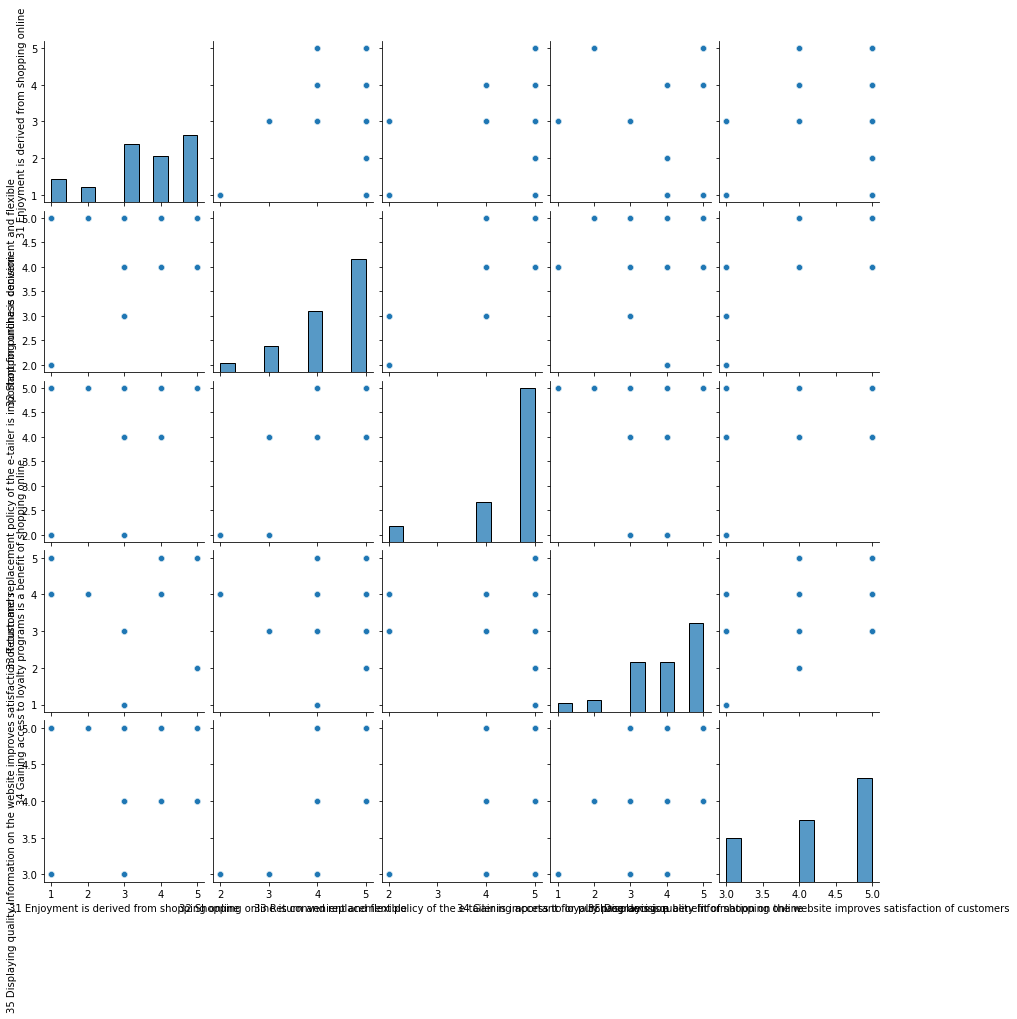

In [44]:
sns.pairplot(df11)

In [45]:
df12 = df.iloc[0:,35:40]

In [46]:
df12

,36 User derive satisfaction while shopping on a good quality website or application,37 Net Benefit derived from shopping online can lead to users satisfaction,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information
0,5,4,5,3,3
1,5,5,5,5,5
2,5,5,4,5,5
3,4,3,4,4,4
4,5,5,5,4,4
...,...,...,...,...,...
264,2,3,4,4,3
265,5,5,5,5,5
266,4,4,4,3,5
267,5,5,5,5,4


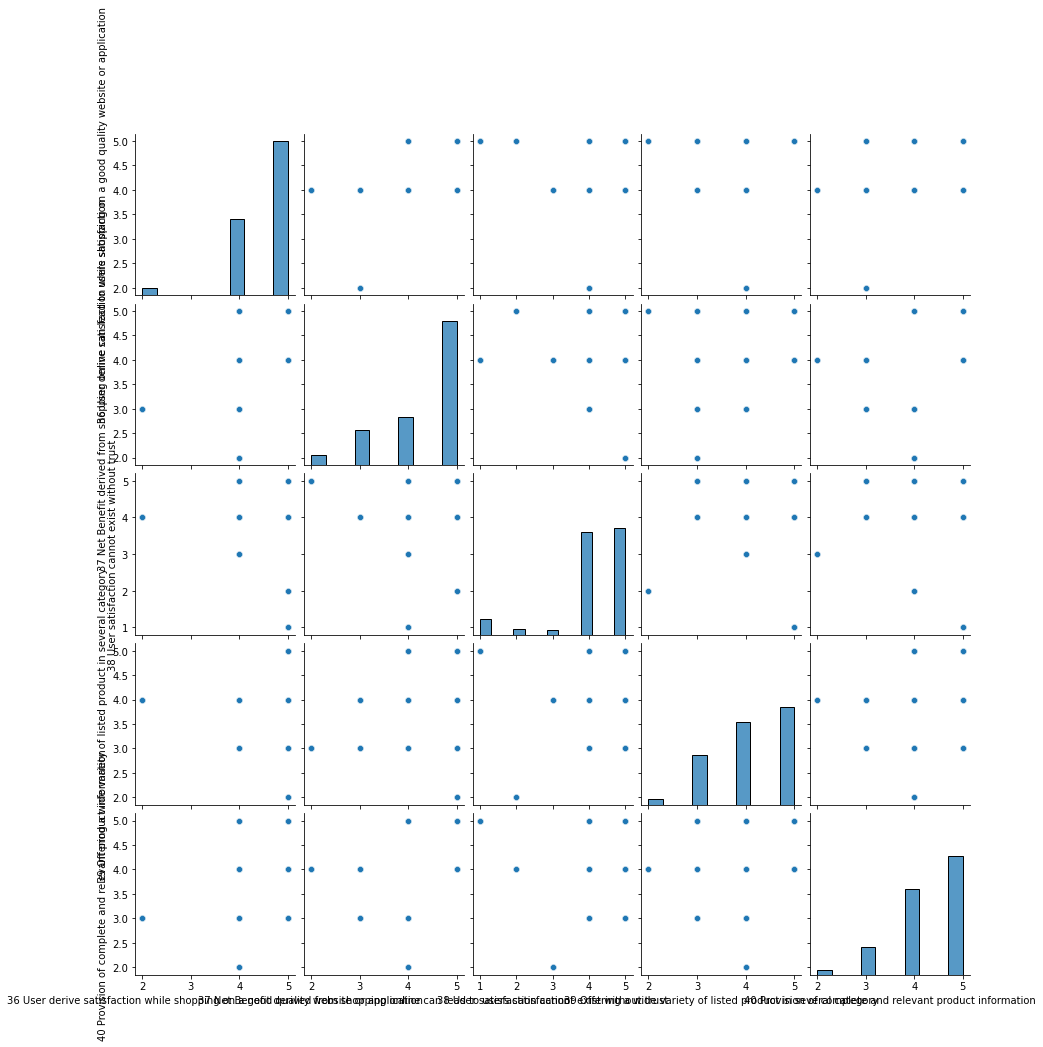

In [47]:
sns.pairplot(df12)

In [48]:
df13 = df.iloc[0:,40:45]

In [49]:
df13

,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer
0,2,3,4,4,5
1,5,3,3,3,5
2,5,4,4,4,3
3,5,4,4,5,4
4,5,4,3,1,5
...,...,...,...,...,...
264,2,3,2,4,3
265,5,5,5,5,5
266,4,4,2,3,4
267,4,4,4,3,3


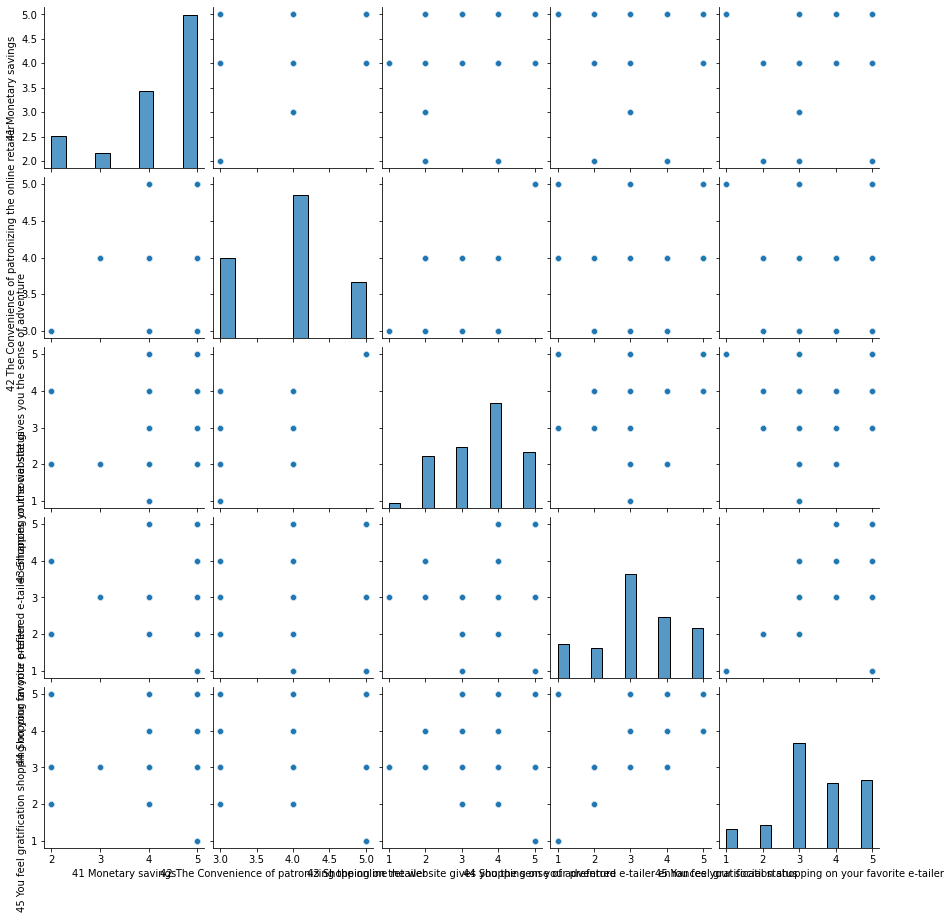

In [50]:
sns.pairplot(df13)

In [51]:
df14 = df.iloc[0:,45:50]

In [52]:
df14

,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent,"From the following, tick any (or all) of the online retailers you have shopped from;",Easy to use website or application,Visual appealing web-page layout
0,4,5,"Amazon.in, Paytm.com",Paytm.com,Flipkart.com
1,5,5,"Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Myntra.com"
2,3,4,"Amazon.in, Paytm.com, Myntra.com","Amazon.in, Paytm.com, Myntra.com","Amazon.in, Paytm.com, Myntra.com"
3,3,4,"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com..."
4,1,5,"Amazon.in, Flipkart.com, Paytm.com, Myntra.com...","Amazon.in, Flipkart.com, Paytm.com, Myntra.com...",Myntra.com
...,...,...,...,...,...
264,4,3,Amazon.in,Amazon.in,Amazon.in
265,5,5,"Amazon.in, Flipkart.com",Flipkart.com,Amazon.in
266,4,4,"Amazon.in, Flipkart.com, Snapdeal.com",Amazon.in,Amazon.in
267,4,3,"Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com","Amazon.in, Flipkart.com, Myntra.com, Snapdeal.com"


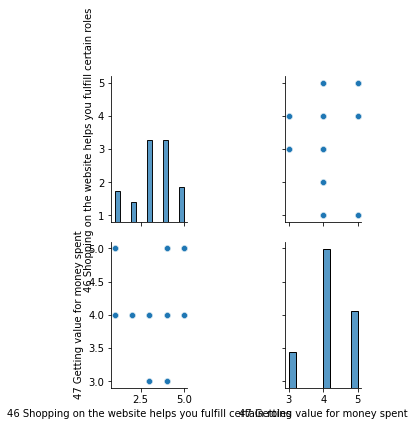

In [53]:
sns.pairplot(df14)

In [54]:
# categorical_columns can be located from column index 0 to 16
categorical_columns=df.iloc[:,:17].columns
categorical_columns=categorical_columns.to_list()

# rating_columns can be located from column index 17 to 46
rating_columns=df.iloc[:,17:47].columns
rating_columns=rating_columns.to_list()

# ecommerce_columns can be located from column index 47 and above
ecommerce_columns=df.iloc[:,47:].columns
ecommerce_columns=ecommerce_columns.to_list()

In [55]:
df[categorical_columns].shape

(269, 17)

In [56]:
df[rating_columns].shape

(269, 30)

In [57]:
df[ecommerce_columns].shape

(269, 24)

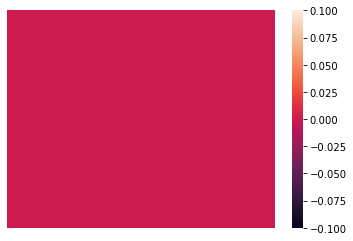

In [58]:
# identifying null values
sns.heatmap(df.isnull())
plt.axis('off')
plt.show()

1    180
0     89
Name: 1Gender of respondent, dtype: int64


Text(0.5, 1.0, 'Gender')

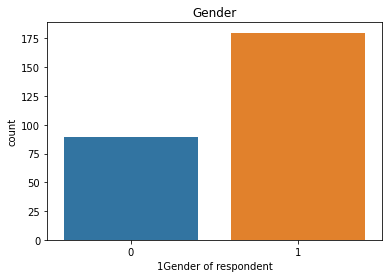

In [59]:
print(df['1Gender of respondent'].value_counts())
sns.countplot(x=df['1Gender of respondent'])
plt.title('Gender')

3    81
2    79
4    70
1    20
5    19
Name: 2 How old are you? , dtype: int64


Text(0.5, 1.0, 'Age')

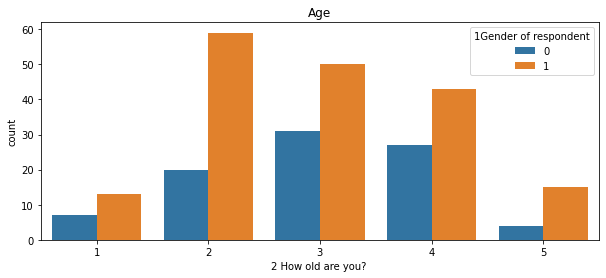

In [60]:
print(df['2 How old are you? '].value_counts())
plt.figure(figsize=(10,4))
sns.countplot(x=df['2 How old are you? '],hue = df['1Gender of respondent'])
plt.title('Age')

from the plot we can see that females are more compared to male in every age group.

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Ghaziabad        18
Solan            18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: 3 Which city do you shop online from?, dtype: int64


Text(0.5, 1.0, 'City')

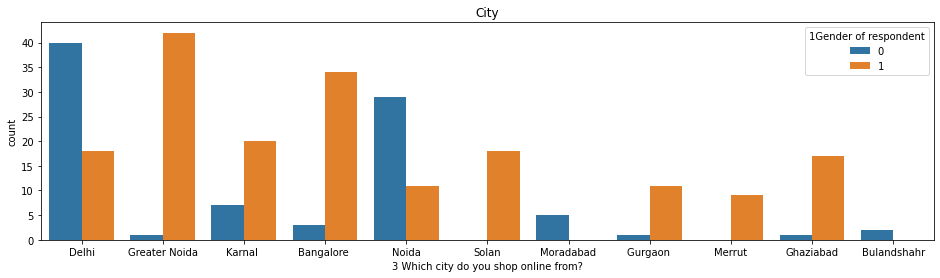

In [61]:
print(df['3 Which city do you shop online from?'].value_counts())
plt.figure(figsize=(16,4))
sns.countplot(x=df['3 Which city do you shop online from?'],hue=df['1Gender of respondent'])
plt.title('City')

3    81
2    79
4    70
1    20
5    19
Name: 2 How old are you? , dtype: int64


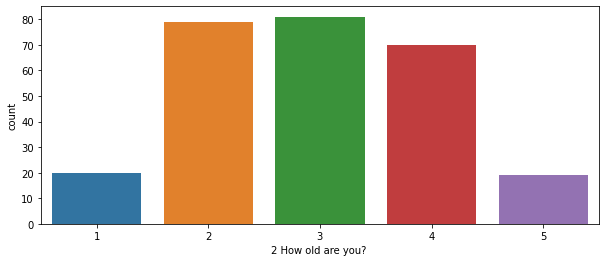

----------------------------------------------------------------------------------------
Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Ghaziabad        18
Solan            18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: 3 Which city do you shop online from?, dtype: int64


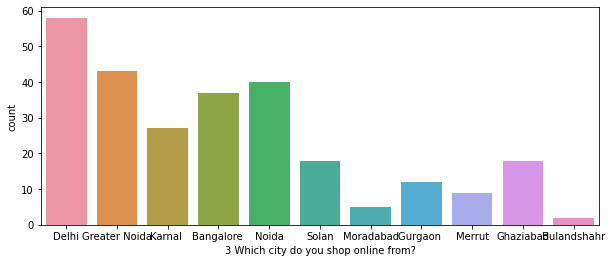

----------------------------------------------------------------------------------------
5    98
3    65
4    47
1    43
2    16
Name: 5 Since How Long You are Shopping Online ?, dtype: int64


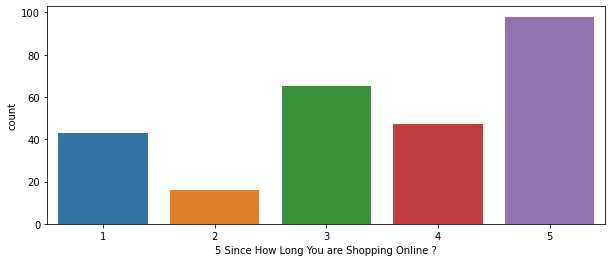

----------------------------------------------------------------------------------------
1    114
4     63
5     53
2     29
3     10
Name: 6 How many times you have made an online purchase in the past 1 year?, dtype: int64


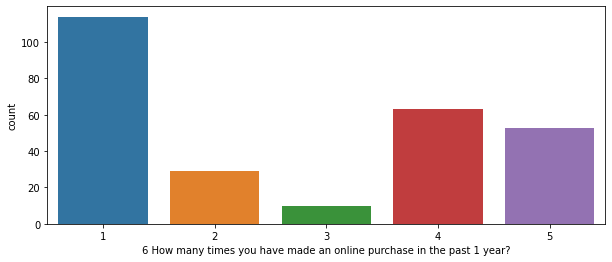

----------------------------------------------------------------------------------------
3    118
2     76
5     71
4      4
Name: 7 How do you access the internet while shopping on-line?, dtype: int64


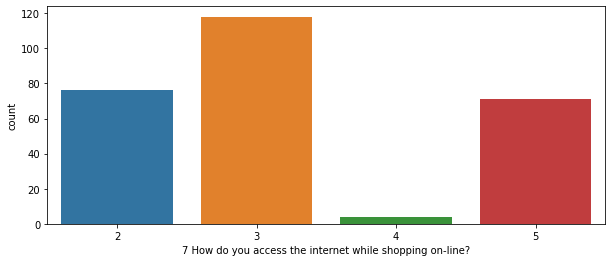

----------------------------------------------------------------------------------------
1    141
2     86
3     30
4     12
Name: 8 Which device do you use to access the online shopping?, dtype: int64


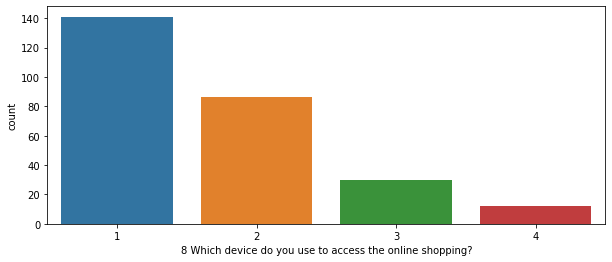

----------------------------------------------------------------------------------------
5    134
4    106
2     29
Name: 9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        , dtype: int64


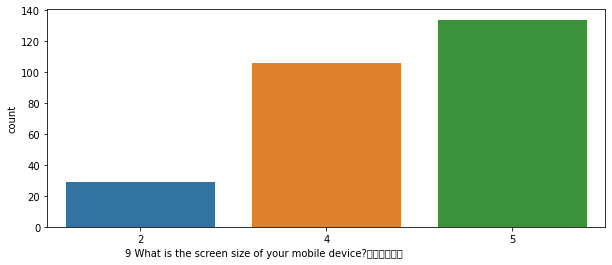

----------------------------------------------------------------------------------------
1    122
2     85
3     62
Name: 10 What is the operating system (OS) of your device?\t\t\t\t                                          , dtype: int64


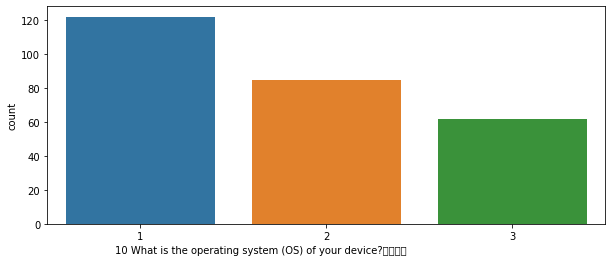

----------------------------------------------------------------------------------------
1    216
2     40
4      8
3      5
Name: 11 What browser do you run on your device to access the website?\t\t\t                                                          , dtype: int64


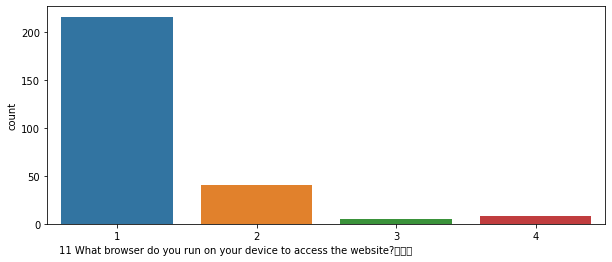

----------------------------------------------------------------------------------------
1    230
3     20
4     19
Name: 12 Which channel did you follow to arrive at your favorite online store for the first time?                                                                   , dtype: int64


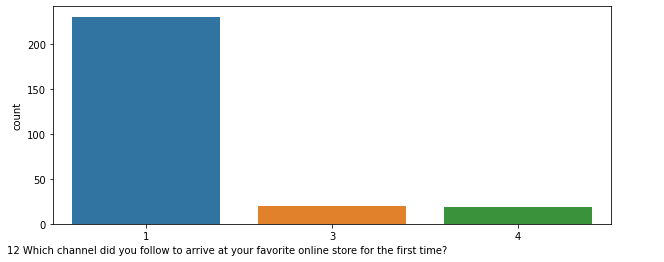

----------------------------------------------------------------------------------------
1    95
4    86
3    70
2    18
Name: 13 After first visit, how do you reach the online retail store?\t\t\t\t                                                   , dtype: int64


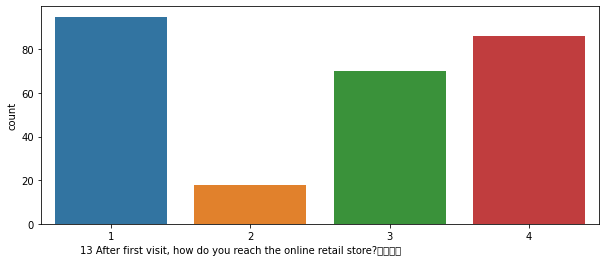

----------------------------------------------------------------------------------------
5    123
3     71
4     46
1     15
2     14
Name: 14 How much time do you explore the e- retail store before making a purchase decision?                                                                   , dtype: int64


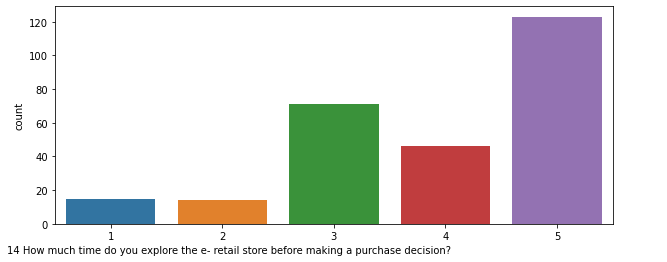

----------------------------------------------------------------------------------------
1    148
2     76
4     45
Name: 15 What is your preferred payment Option?\t\t\t\t\t                                                                                                                               , dtype: int64


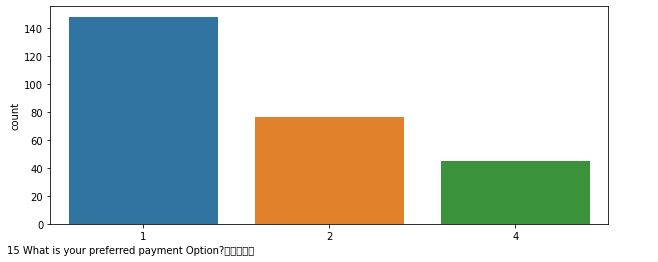

----------------------------------------------------------------------------------------
3    171
1     48
4     35
5     15
Name: 16 How 4 do you abandon (selecting an items and leaving without making payment) your shopping cart?\t\t\t\t\t\t\t                                                   , dtype: int64


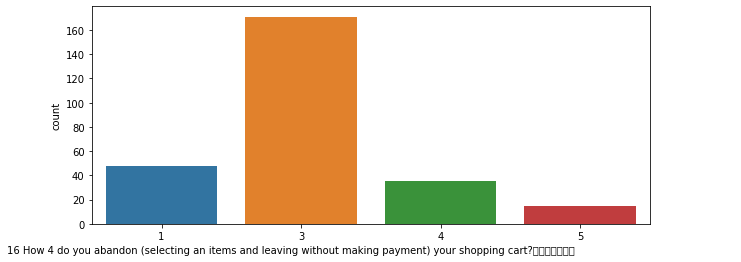

----------------------------------------------------------------------------------------
2    133
5     54
1     37
3     31
4     14
Name: 17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       , dtype: int64


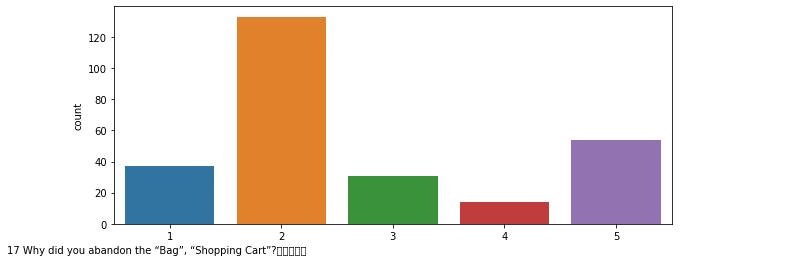

----------------------------------------------------------------------------------------


In [62]:
#value counts for other categorical columns
for col in categorical_columns:
    if col!= '1Gender of respondent' and col!='4 What is the Pin Code of where you shop online from?':
        print(df[col].value_counts())
        plt.figure(figsize=(10,4))
        sns.countplot(x=df[col])
        plt.show()
        print("----------------------------------------------------------------------------------------")

In [63]:
df['4 What is the Pin Code of where you shop online from?'].value_counts().head()


201308    38
132001    19
201310    18
110044    16
173229     9
Name: 4 What is the Pin Code of where you shop online from?, dtype: int64

2    133
5     54
1     37
3     31
4     14
Name: 17 Why did you abandon the “Bag”, “Shopping Cart”?\t\t\t\t\t                                                                                                                                                       , dtype: int64


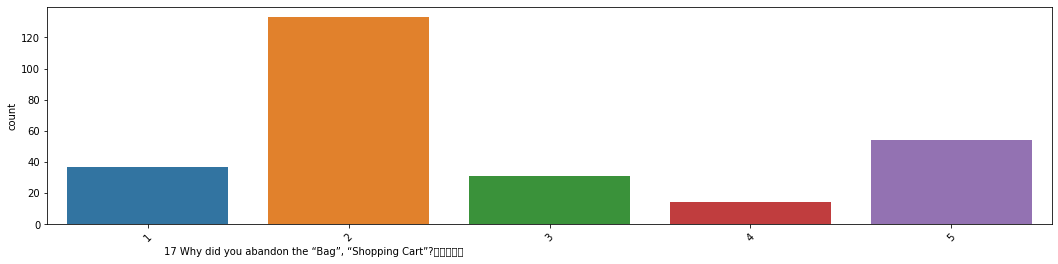

-----------------------------------------------------------------------------------------------------------------


In [67]:
#Value_Count for columns in ecommerce_columns:
print(df[col].value_counts())
plt.figure(figsize=(18,4))
sns.countplot(x=df[col])
plt.xticks(rotation=45)
plt.show()
print("-----------------------------------------------------------------------------------------------------------------")

array([[<AxesSubplot:title={'center':'1Gender of respondent'}>,
        <AxesSubplot:title={'center':'2 How old are you? '}>,
        <AxesSubplot:title={'center':'4 What is the Pin Code of where you shop online from?'}>,
        <AxesSubplot:title={'center':'5 Since How Long You are Shopping Online ?'}>,
        <AxesSubplot:title={'center':'6 How many times you have made an online purchase in the past 1 year?'}>,
        <AxesSubplot:title={'center':'7 How do you access the internet while shopping on-line?'}>,
        <AxesSubplot:title={'center':'8 Which device do you use to access the online shopping?'}>],
       [<AxesSubplot:title={'center':'9 What is the screen size of your mobile device?\t\t\t\t\t\t                                        '}>,
        <AxesSubplot:title={'center':'10 What is the operating system (OS) of your device?\t\t\t\t                                          '}>,
        <AxesSubplot:title={'center':'11 What browser do you run on your device to access the 

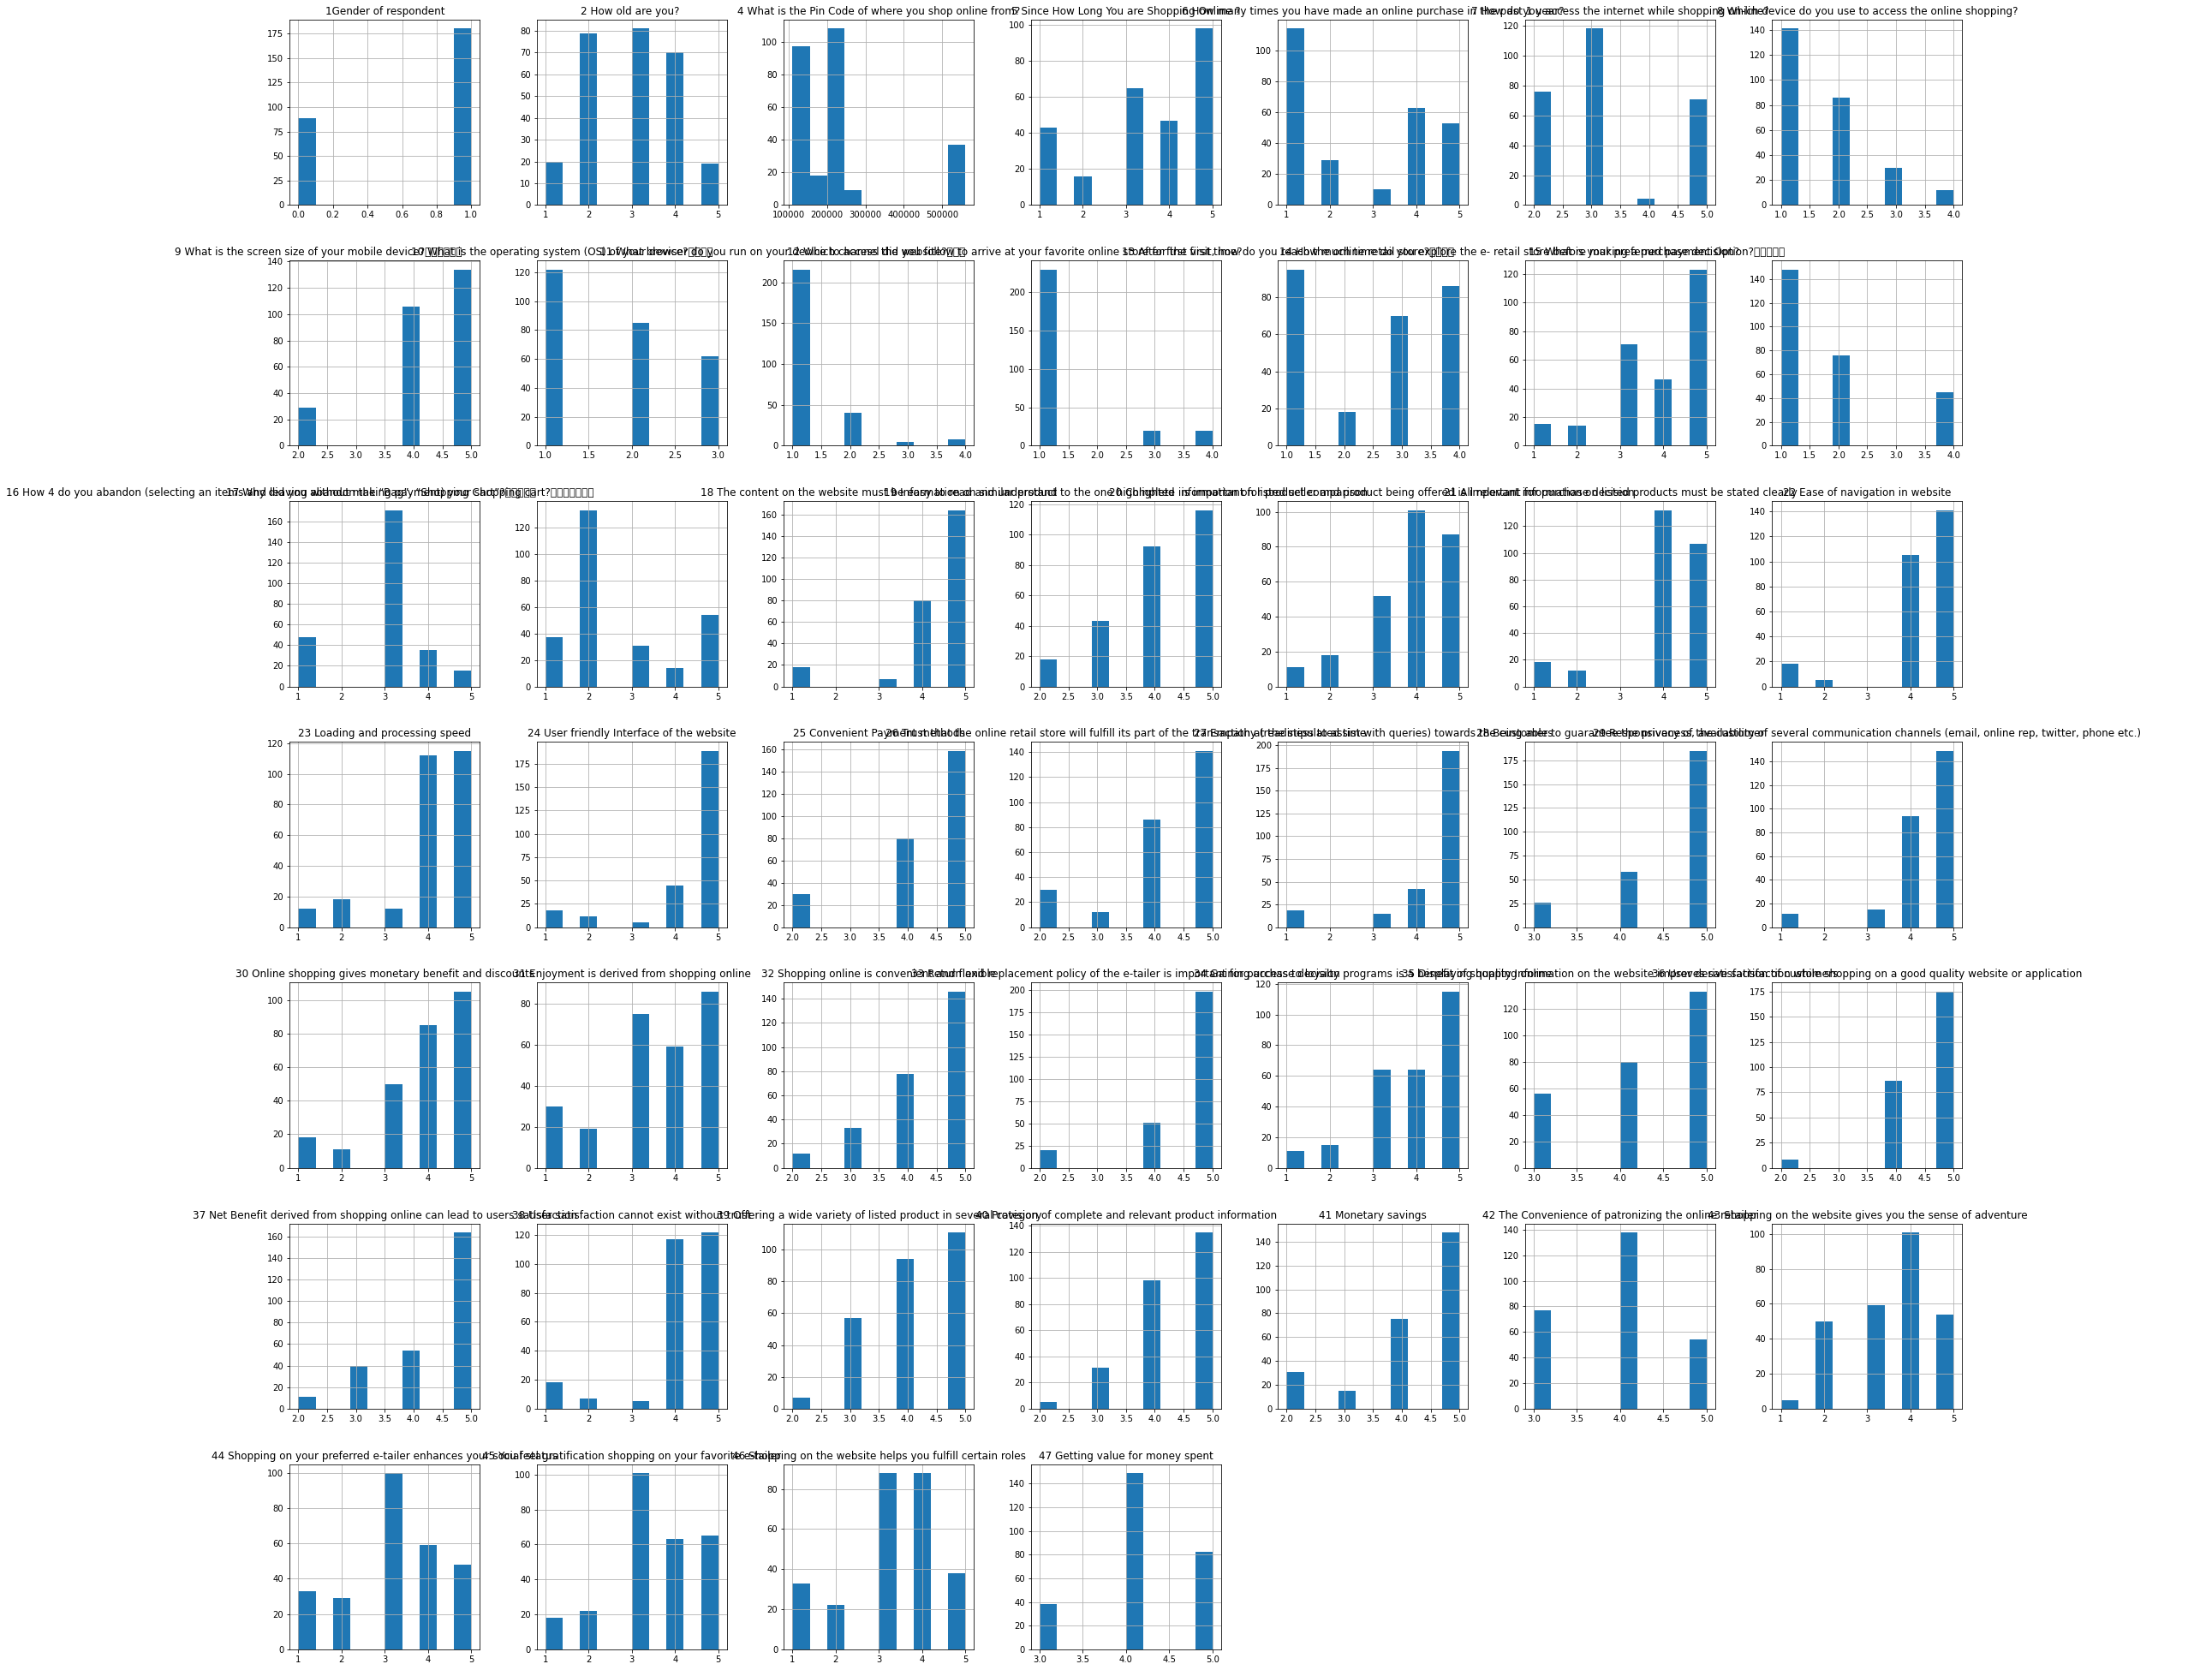

In [68]:
df.hist(figsize=(35,35))


In [69]:
df.corr()

,1Gender of respondent,2 How old are you?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,11 What browser do you run on your device to access the website?\t\t\t,...,38 User satisfaction cannot exist without trust,39 Offering a wide variety of listed product in several category,40 Provision of complete and relevant product information,41 Monetary savings,42 The Convenience of patronizing the online retailer,43 Shopping on the website gives you the sense of adventure,44 Shopping on your preferred e-tailer enhances your social status,45 You feel gratification shopping on your favorite e-tailer,46 Shopping on the website helps you fulfill certain roles,47 Getting value for money spent
1Gender of respondent,1.000000,-0.034449,0.260696,-0.046005,0.076121,-0.200974,-0.241847,-0.058760,-0.038207,-0.116712,...,0.097540,0.152595,0.357061,0.201673,0.198382,-0.005218,-0.046397,0.018482,-0.113160,0.202014
2 How old are you?,-0.034449,1.000000,-0.057393,0.014049,0.005089,0.024228,0.292176,0.227841,-0.133597,-0.151708,...,-0.094664,0.035895,0.082622,-0.056316,0.035612,-0.002979,-0.176643,-0.203841,-0.121404,0.052869
4 What is the Pin Code of where you shop online from?,0.260696,-0.057393,1.000000,0.092980,-0.021229,0.134879,-0.103424,-0.189814,0.077905,0.063588,...,-0.072355,0.073624,0.067628,0.162374,0.160860,0.025634,-0.240597,0.018836,-0.139511,0.127763
5 Since How Long You are Shopping Online ?,-0.046005,0.014049,0.092980,1.000000,0.291104,0.080738,0.309634,0.118596,-0.141768,-0.236578,...,0.063752,0.006272,0.157118,-0.031713,-0.014764,0.111851,-0.026515,-0.047239,0.174400,0.175901
6 How many times you have made an online purchase in the past 1 year?,0.076121,0.005089,-0.021229,0.291104,1.000000,0.135034,0.057656,-0.127544,0.040689,-0.153269,...,0.025346,0.204100,0.193492,0.122437,0.047127,0.175364,-0.048847,-0.009571,0.057217,0.196359
7 How do you access the internet while shopping on-line?,-0.200974,0.024228,0.134879,0.080738,0.135034,1.000000,0.068663,0.036367,-0.009826,0.029232,...,-0.054386,0.017909,-0.045458,-0.073796,-0.052147,0.065420,0.049525,-0.014762,-0.027241,-0.022531
8 Which device do you use to access the online shopping?,-0.241847,0.292176,-0.103424,0.309634,0.057656,0.068663,1.000000,0.596511,-0.561938,-0.329284,...,-0.326420,-0.163098,-0.155573,-0.313940,0.003577,-0.032400,-0.332072,-0.299548,-0.204089,-0.039320
9 What is the screen size of your mobile device?\t\t\t\t\t\t,-0.058760,0.227841,-0.189814,0.118596,-0.127544,0.036367,0.596511,1.000000,-0.775082,-0.293665,...,-0.244383,-0.231767,0.002365,-0.359693,0.125193,0.041335,0.106184,-0.453578,-0.025609,-0.295416
10 What is the operating system (OS) of your device?\t\t\t\t,-0.038207,-0.133597,0.077905,-0.141768,0.040689,-0.009826,-0.561938,-0.775082,1.000000,0.409415,...,0.243950,0.260572,-0.142491,0.471333,-0.068273,0.031740,0.139511,0.430597,0.003775,0.193282
11 What browser do you run on your device to access the website?\t\t\t,-0.116712,-0.151708,0.063588,-0.236578,-0.153269,0.029232,-0.329284,-0.293665,0.409415,1.000000,...,-0.045722,-0.075542,-0.534248,-0.159088,-0.230562,-0.325374,0.130332,0.090460,-0.131938,-0.277167


In [71]:
df.skew()

1Gender of respondent                                                                                                                                                                                                 -0.723007
2 How old are you?                                                                                                                                                                                                     0.063243
4 What is the Pin Code of where you shop online from?                                                                                                                                                                  1.748322
5 Since How Long You are Shopping Online ?                                                                                                                                                                            -0.554705
6 How many times you have made an online purchase in the past 1 year?                                   

<AxesSubplot:>

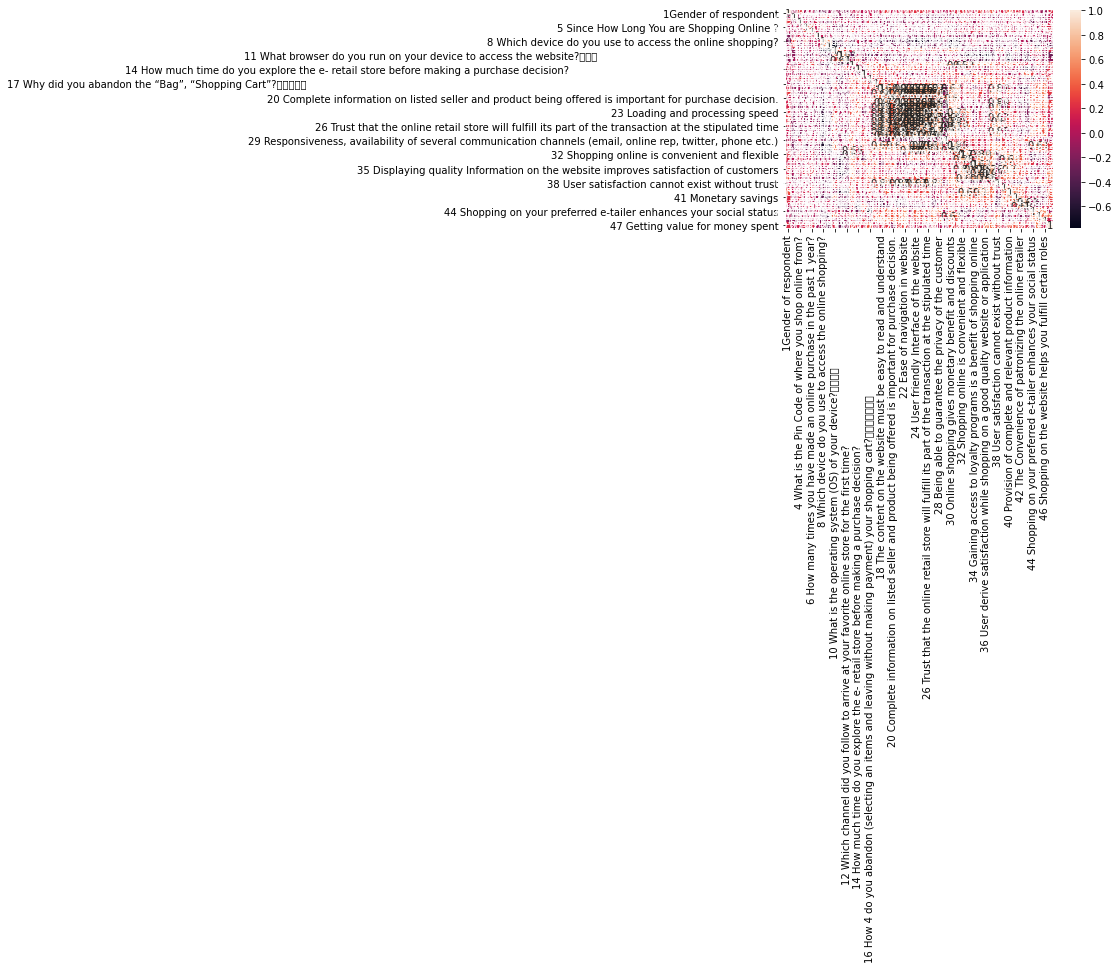

In [72]:
sns.heatmap(df.corr(),annot=True)

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
x=df.iloc[:,0:-1]
x

,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,Presence of online assistance through multi-channel,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before
0,0,3,Delhi,110009,5,4,4,3,5,1,...,Paytm.com,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in
1,1,2,Delhi,110030,5,5,2,1,2,3,...,"Amazon.in, Flipkart.com, Myntra.com","Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com"
2,1,2,Greater Noida,201308,4,5,3,1,4,2,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in
3,0,2,Karnal,132001,4,1,3,1,4,3,...,"Amazon.in, Flipkart.com, Myntra.com, Snapdeal",Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com"
4,1,2,Bangalore,530068,3,2,2,1,2,3,...,"Amazon.in, Myntra.com","Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,1,2,Solan,173212,2,1,3,1,4,2,...,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in,Amazon.in
265,1,3,Ghaziabad,201008,2,4,3,1,5,2,...,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com,Flipkart.com
266,1,4,Bangalore,560010,3,1,3,2,5,1,...,Amazon.in,Amazon.in,Snapdeal.com,Amazon.in,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in
267,1,1,Solan,173229,3,1,2,1,4,2,...,"Amazon.in, Flipkart.com, Myntra.com, Snapdeal",Amazon.in,"Amazon.in, Myntra.com, Snapdeal.com",Amazon.in,"Amazon.in, Snapdeal.com",Amazon.in,Amazon.in,Amazon.in,"Myntra.com, Snapdeal.com","Myntra.com, Snapdeal.com"


In [75]:
x.shape

(269, 70)

In [76]:
x.shape[1]

70

In [77]:
y=df.iloc[:,-1]
y

0                          Flipkart.com
1                 Amazon.in, Myntra.com
2      Amazon.in, Paytm.com, Myntra.com
3               Amazon.in, Flipkart.com
4                 Amazon.in, Myntra.com
                     ...               
264                           Amazon.in
265                        Flipkart.com
266                           Amazon.in
267                           Amazon.in
268                           Amazon.in
Name: Which of the Indian online retailer would you recommend to a friend?, Length: 269, dtype: object

# ENCODING

In [89]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=LE.fit_transform(df[i])


In [90]:
# Checking the dataframe after encoding
df.head()


,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,0,3,2,110009,5,4,4,3,5,1,...,0,0,3,5,0,3,2,0,0,6
1,1,2,2,110030,5,5,2,1,2,3,...,1,6,7,10,7,5,0,4,1,3
2,1,2,4,201308,4,5,3,1,4,2,...,7,6,4,7,0,3,5,6,0,5
3,0,2,6,132001,4,1,3,1,4,3,...,9,7,4,8,5,3,1,1,2,1
4,1,2,0,530068,3,2,2,1,2,3,...,5,8,5,8,7,3,0,7,6,3


In [91]:
# Checking statistical summary of the dataset
df.describe()


,1Gender of respondent,2 How old are you?,3 Which city do you shop online from?,4 What is the Pin Code of where you shop online from?,5 Since How Long You are Shopping Online ?,6 How many times you have made an online purchase in the past 1 year?,7 How do you access the internet while shopping on-line?,8 Which device do you use to access the online shopping?,9 What is the screen size of your mobile device?\t\t\t\t\t\t,10 What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
count,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,...,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000,269.000000
mean,0.669145,2.959108,4.494424,220465.747212,3.524164,2.672862,3.260223,1.676580,4.282528,1.776952,...,4.044610,4.063197,3.843866,5.988848,3.717472,2.736059,2.189591,3.587361,2.133829,2.397770
std,0.471398,1.066012,3.187687,140524.341051,1.436586,1.651788,1.135887,0.843904,0.923426,0.797892,...,3.343218,3.177536,2.103162,2.855321,2.853728,1.725857,2.152169,2.557690,2.171029,2.362991
min,0.000000,1.000000,0.000000,110008.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,2.000000,122018.000000,3.000000,1.000000,2.000000,1.000000,4.000000,1.000000,...,1.000000,1.000000,3.000000,4.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,1.000000,3.000000,4.000000,201303.000000,4.000000,2.000000,3.000000,1.000000,4.000000,2.000000,...,3.000000,4.000000,4.000000,7.000000,3.000000,3.000000,1.000000,4.000000,1.000000,1.000000
75%,1.000000,4.000000,7.000000,201310.000000,5.000000,4.000000,5.000000,2.000000,5.000000,2.000000,...,7.000000,7.000000,5.000000,8.000000,7.000000,4.000000,5.000000,6.000000,4.000000,5.000000
max,1.000000,5.000000,10.000000,560037.000000,5.000000,5.000000,5.000000,4.000000,5.000000,3.000000,...,9.000000,9.000000,7.000000,10.000000,7.000000,5.000000,6.000000,7.000000,7.000000,7.000000


# CHECKING OUTLIERS

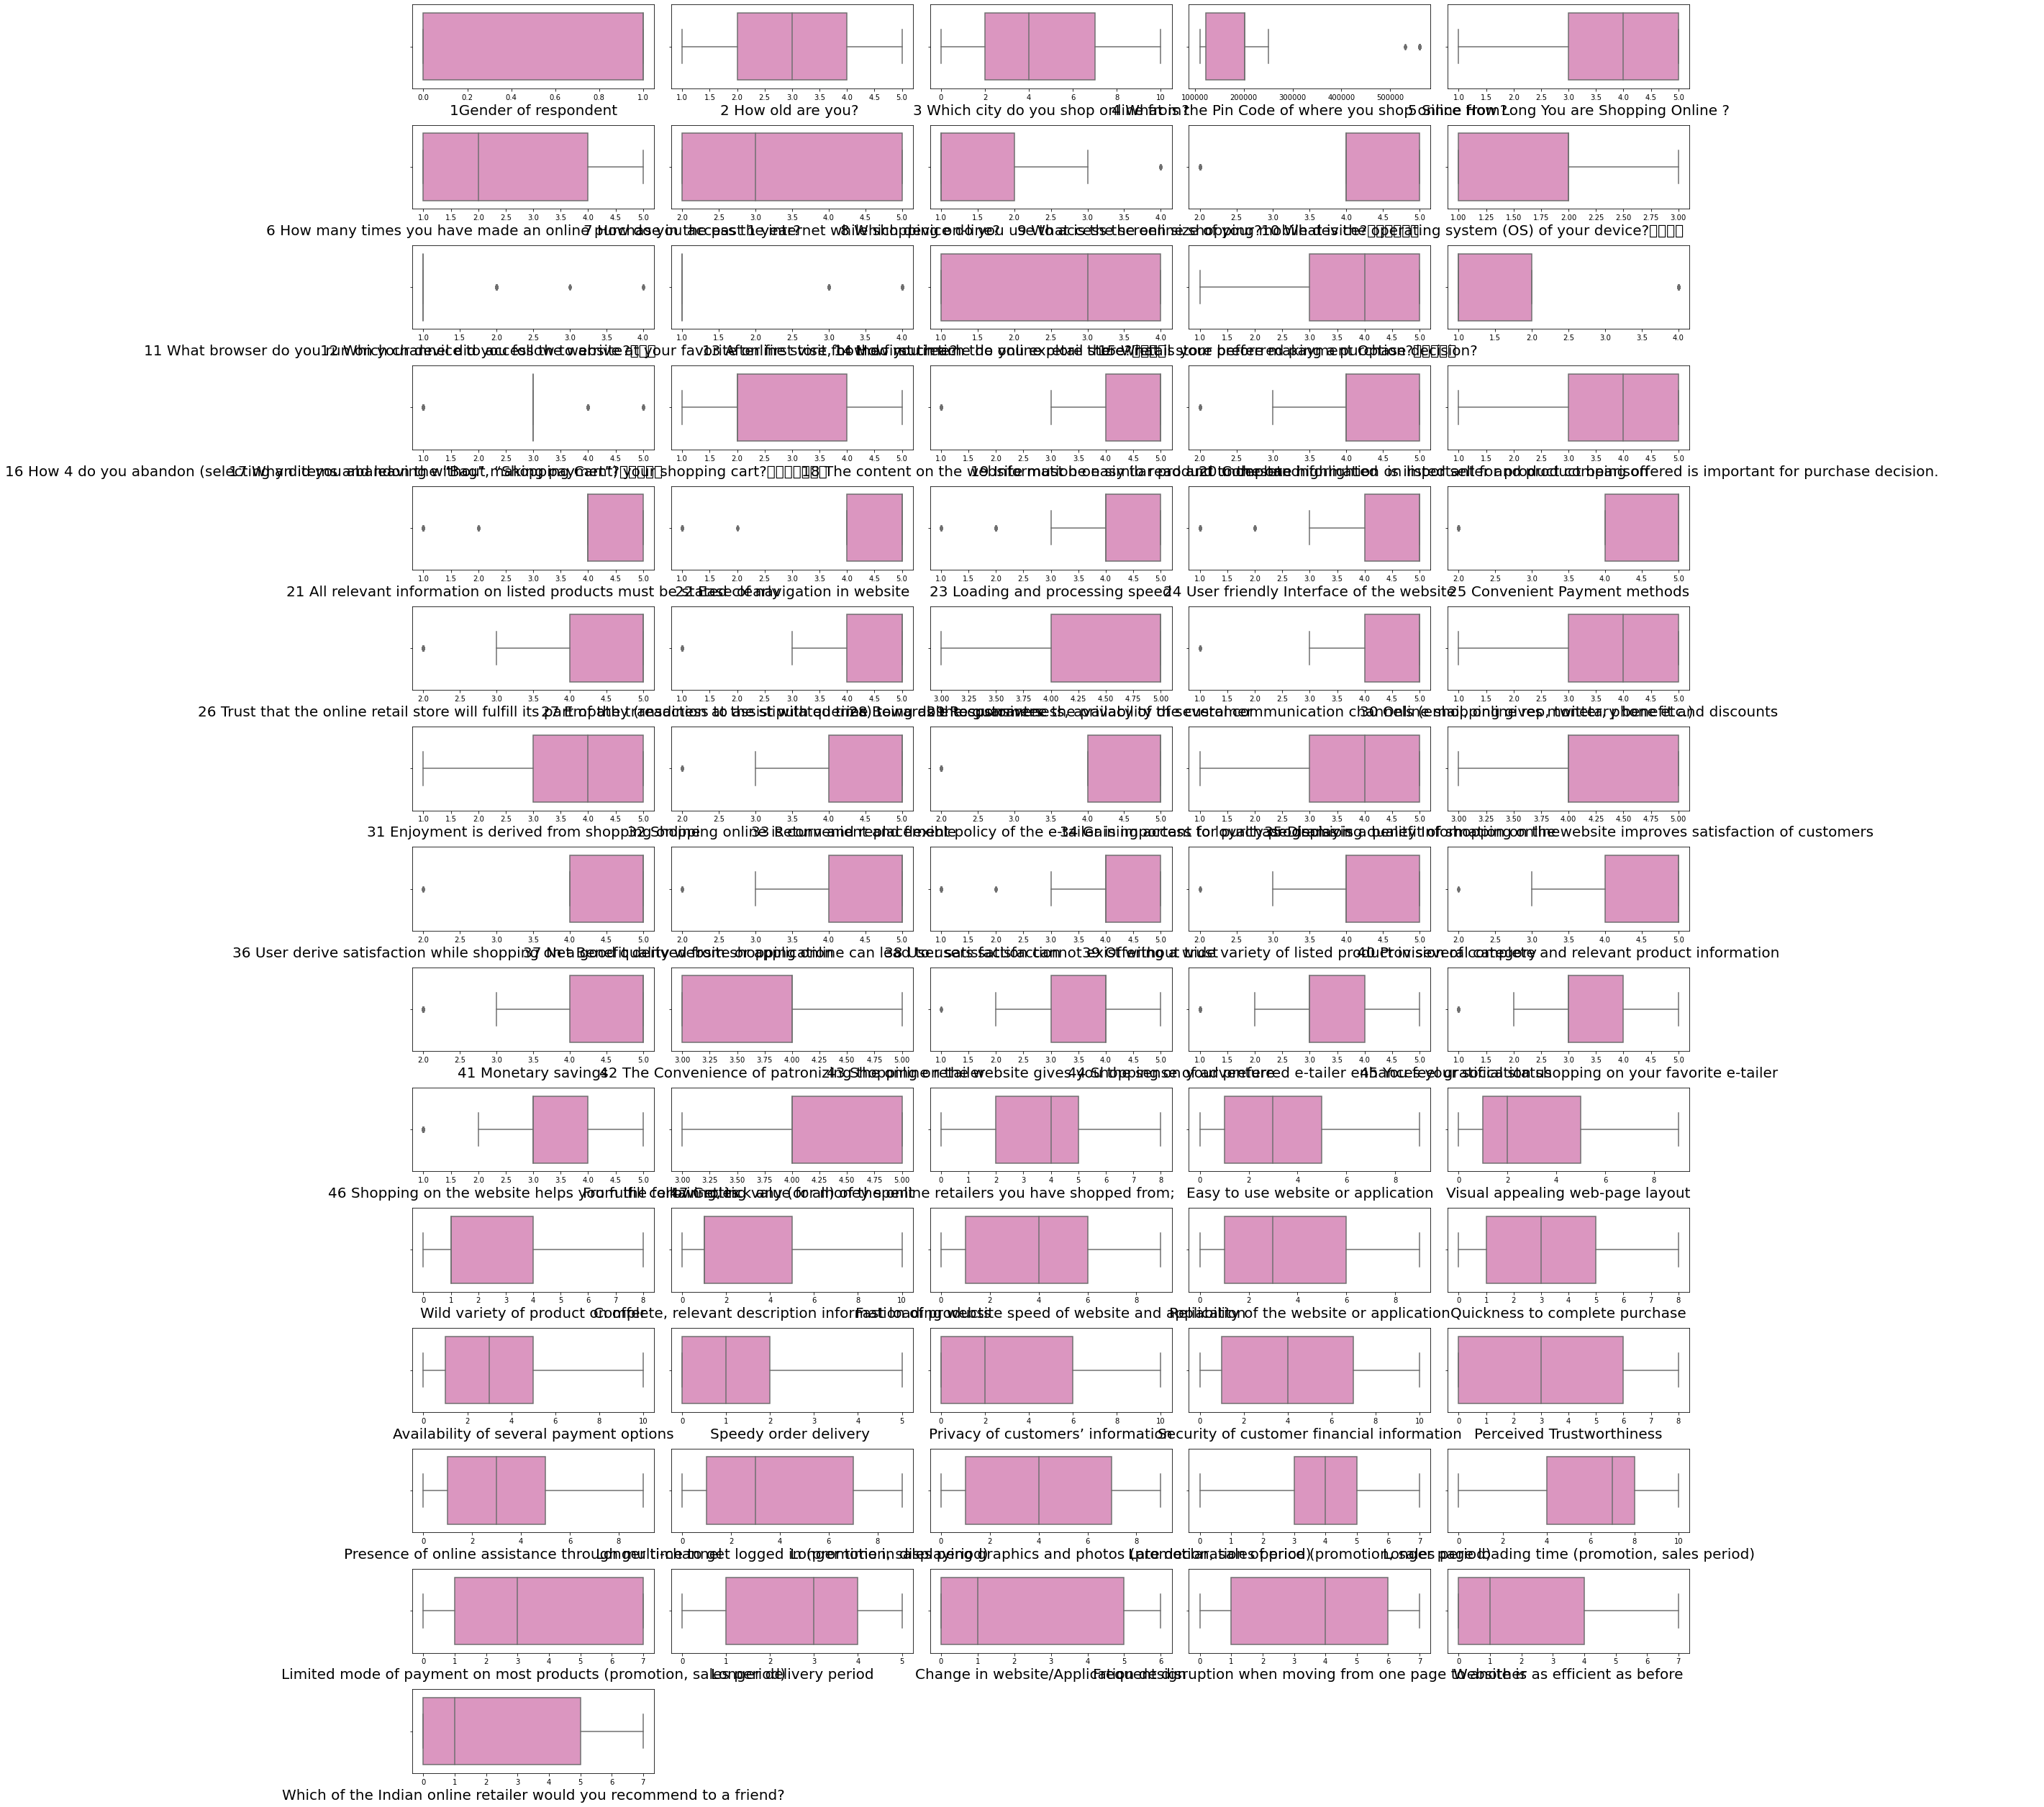

In [92]:
# Let's check the outliers by ploting box plot

plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
for column in df:
    if plotnumber<=71:
        ax=plt.subplot(15,5,plotnumber)
        sns.boxplot(df[column],palette="Set2_r")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


In [93]:
# Checking the skewness
df.skew()

1Gender of respondent                                                  -0.723007
2 How old are you?                                                      0.063243
3 Which city do you shop online from?                                   0.313729
4 What is the Pin Code of where you shop online from?                   1.748322
5 Since How Long You are Shopping Online ?                             -0.554705
                                                                          ...   
Longer delivery period                                                 -0.147702
Change in website/Application design                                    0.354163
Frequent disruption when moving from one page to another               -0.100608
Website is as efficient as before                                       0.662084
Which of the Indian online retailer would you recommend to a friend?    0.583614
Length: 71, dtype: float64